In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], 
                       columns=iris['feature_names']+['target'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [17]:
x_train, x_test, y_train, y_test= train_test_split(X, y,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
x_train= np.asarray(x_train)
y_train= np.asarray(y_train)

x_test= np.asarray(x_test)
y_test= np.asarray(y_test)

In [18]:
scaler = Normalizer()
scaler.fit(x_train)
x_tr_norm = scaler.transform(x_train)
x_tt_norm = scaler.transform(x_test)

In [6]:
knn = KNeighborsClassifier()
knn.fit(x_tr_norm, y_tr)

KNeighborsClassifier()

In [7]:
y_pred = knn.predict(x_tt_norm)

In [8]:
pd.DataFrame({'Actual': y_tt, 'Predicted': y_pred})

,Actual,Predicted
114,2.0,2.0
62,1.0,1.0
33,0.0,0.0
107,2.0,2.0
7,0.0,0.0
100,2.0,2.0
40,0.0,0.0
86,1.0,1.0
76,1.0,1.0
71,1.0,1.0


<Axes: >

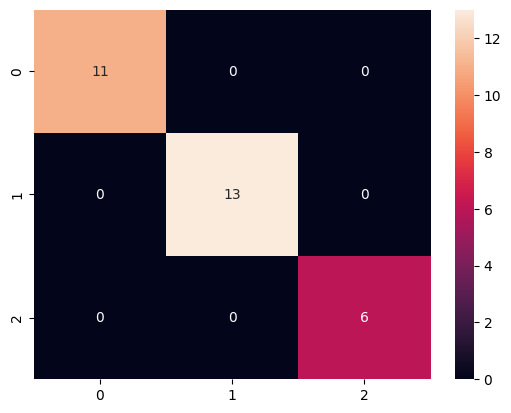

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_tt, y_pred)
sns.heatmap(cm, annot=True)

In [10]:
accuracy_score(y_tt, y_pred)

1.0

In [11]:
def distance_ecu(x_train, x_test_point):
  """
  Input:
    - x_train: corresponding to the training data
    - x_test_point: corresponding to the test point

  Output:
    -distances: The distances between the test point and each point in the training data.

  """
  distances= []  ## create empty list called distances
  for row in range(len(x_train)): ## Loop over the rows of x_train
      current_train_point= x_train[row] #Get them point by point
      current_distance= 0 ## initialize the distance by zero

      for col in range(len(current_train_point)): ## Loop over the columns of the row
          
          current_distance += (current_train_point[col] - x_test_point[col]) **2
          ## Or current_distance = current_distance + (x_train[i] - x_test_point[i])**2
      current_distance= np.sqrt(current_distance)

      distances.append(current_distance) ## Append the distances

  # Store distances in a dataframe
  distances= pd.DataFrame(data=distances,columns=['dist'])
  return distances

In [12]:
def nearest_neighbors(distance_point, K):
    """
    Input:
        -distance_point: the distances between the test point and each point in the training data.
        -K             : the number of neighbors

    Output:
        -df_nearest: the nearest K neighbors between the test point and the training data.

    """

    # Sort values using the sort_values function
    df_nearest= distance_point.sort_values(by=['dist'], axis=0)

    ## Take only the first K neighbors
    df_nearest= df_nearest[:K]
    return df_nearest

In [13]:
def voting(df_nearest, y_train):
    """
    Input:
        -df_nearest: dataframe contains the nearest K neighbors between the full training dataset and the test point.
        -y_train: the labels of the training dataset.

    Output:
        -y_pred: the prediction based on Majority Voting

    """

    ## Use the Counter Object to get the labels with K nearest neighbors.
    counter_vote= Counter(y_train[df_nearest.index])

    y_pred= counter_vote.most_common()[0][0]   # Majority Voting

    return y_pred

In [14]:
def KNN_from_scratch(x_train, y_train, x_test, K):

    """
    Input:
    -x_train: the full training dataset
    -y_train: the labels of the training dataset
    -x_test: the full test dataset
    -K: the number of neighbors

    Output:
    -y_pred: the prediction for the whole test set based on Majority Voting.

    """

    y_pred=[]

    ## Loop over all the test set and perform the three steps
    for x_test_point in x_test:
      distance_point  = distance_ecu(x_train, x_test_point)  ## Step 1
      df_nearest_point= nearest_neighbors(distance_point, K)  ## Step 2
      y_pred_point    = voting(df_nearest_point, y_train) ## Step 3
      y_pred.append(y_pred_point)

    return y_pred  


In [15]:
K=3
y_pred_scratch= KNN_from_scratch(x_tr_norm, y_tr, x_tt_norm, K)
print(y_pred_scratch)

KeyError: '[26, 62] not in index'